In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *

In [10]:
# import the dataset
data = np.asarray(pd.read_csv('student_debt.csv',header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# pad input with ones
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)

# solve linear system of equations for regression fit
def linear_regression(x,y):
    A = np.array([0.,0.,0.,0.])
    A.shape = (2,2)
    b = np.array([0.,0.])
    b.shape = (2,1)
    for i in x_new:
        A += dot(i.reshape(2,1),i.reshape(2,1).T)
    A_inv = np.linalg.inv(A)
        
    for i in range(len(x_new)):
        b += y[i].reshape(1,1) * x_new[i].reshape(2,1)
        
    w = dot(A_inv,b)    
    return w 

w=linear_regression(x,y)

if this linear trend continues there will be 3.936010564207436 trillion dollars in student debt in 2050!


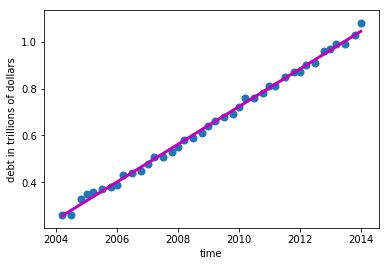

In [11]:
# print out predicted amount of student debt in 2050
debt_in_2050 = w[0] + w[1]*2050
print ('if this linear trend continues there will be ' + str(debt_in_2050[0]) + ' trillion dollars in student debt in 2050!')

# plot data with linear fit - this is optional
s = np.linspace(np.min(x),np.max(x))
t = w[0] + w[1]*s
plt.plot(s,t,linewidth = 3,color = 'm')
plt.scatter(x,y,linewidth = 2)
plt.xlabel('time')
plt.ylabel('debt in trillions of dollars')
plt.show()